# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом по классификации emoji из тг. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 100 классов и около 100 картинок на каждый класс. Классы пронумерованы, кодом смайлика к которому относятся элементы класса. Скачать датасет можно вот [тут](https://disk.yandex.ru/d/elNF0DS94o2GVA).

Структура датасета -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.4**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.8**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.4)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.4) / 0.4)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе.

Good luck & have fun! :)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 54.3 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [3]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

import torchvision.transforms as T
from IPython.display import clear_output
import torchvision.models as models
# You may add any imports you need

In [4]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать свою модель руками в классе YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [5]:
!unzip /content/drive/MyDrive/train.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdWV7jDtEsQ28oBzsbIIfVG-F4AAIlAQACMGP4EvLlgLlAuzbmLwQ.png  
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdW-VcOVZDoddQ5iW1Vl4j-CPUAAK9AAOz9pAOX4vVC42AyzUvBA.png  
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdWXKHRZL5D_rZ11kHD3G8qxBxAAKUSwAC6VUFGJkJit_US0owLwQ.png  
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdWxMjGFwiQ77TqCuJvq2LnWxkAAJ6CgACxdzwSa0HZdbZGeT8LwQ.png  
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdWxNtKj3ZyYsZMaBMFXIYLMQkAAJjDQACDGRBSe8NWWS6H50uLwQ.png  
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdWykQQki0iGB73AWNrL_1fx8sAAK1FwAC7HPhSZ-AfkaOzCShLwQ.png  
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdWYMyb9KMCNdQGnK7MDjoJ_y4AALUgwACns4LAAHAn3aicTB70S8E.png  
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdWYnf09AXUVY7frQ1GNGa-fkYAAJwDwACKefgS39Z6RJabCc0LwQ.png  
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdWZUwZzfYDiWKIWzlfOUl9iYsAAJDGwACBff5SI3j4RQYUudZLwQ.png  
  inflating: train/U+1F

In [6]:
!unzip /content/drive/MyDrive/val

Archive:  /content/drive/MyDrive/val.zip
   creating: val/U+1F232/
  inflating: val/U+1F232/CAACAgIAAxUAAWSdeMJVk6ExF0qcEyOmw5vZ9PYmAAIJGgACx7FJS3LIktWMNnlOLwQ.png  
   creating: val/U+1F306/
  inflating: val/U+1F306/CAACAgQAAxUAAWSdZRnGC_mrkmb323WOd3zboW1TAAJSDgACOOggURrmHI_JQqWgLwQ.png  
   creating: val/U+1F31F/
  inflating: val/U+1F31F/CAACAgEAAxUAAWSdbbFotWMvyywebYUfpgGB_sRuAAInBAACUUr3AAGbcwwzbDLnyi8E.png  
  inflating: val/U+1F31F/CAACAgEAAxUAAWSdeCl6tOBADsA1zFJKOWeXJCsrAAJqBgACdwP3CzRBaapE52_lLwQ.png  
  inflating: val/U+1F31F/CAACAgEAAxUAAWSdobaAZ8ZdmUpeZ8ymxvpMkzOfAAJyAgACKrgoRWKO1_3r9AwzLwQ.png  
  inflating: val/U+1F31F/CAACAgEAAxUAAWSdobamWWNHyapY0whDcNvEufO7AAKeAgAC_dgAAUTPcG-963Nxmy8E.png  
  inflating: val/U+1F31F/CAACAgEAAxUAAWSdobZDarnQ7DwC3t7JWnMqBORWAAJSAgAClgIQRIcv6DRkwVmaLwQ.png  
  inflating: val/U+1F31F/CAACAgEAAxUAAWSdogNsv8iqixvIgV4CUbAM8EunAALGCAACyiwJRHjqIiXsJEAhLwQ.png  
  inflating: val/U+1F31F/CAACAgEAAxUAAWSdoNVX9IT58taODQc0F0_u-WAFAAJ2AgACwkJARMI-aH9eZY

In [7]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [21]:
train_transform = T.Compose([
    T.RandomHorizontalFlip(p=0.25), # отражение изображения по горизонтали с вероятностью 25%
    T.RandomVerticalFlip(p=0.25), # отражение изображения по вертикали с вероятностью 25%
    T.RandomRotation(degrees=45), # поворот изображения на случайный угол от -45 до 45 градусов
    T.ToTensor()
])

In [ ]:
val_transform = T.Compose([
    T.ToTensor()
])

In [22]:
train_dataset = ImageFolder('/content/train', transform=train_transform)
val_dataset = ImageFolder('/content/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True, pin_memory=True, num_workers = 4)
val_dataloader = DataLoader(val_dataset, batch_size = 64, shuffle = False, pin_memory=True, num_workers = 4)

In [11]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

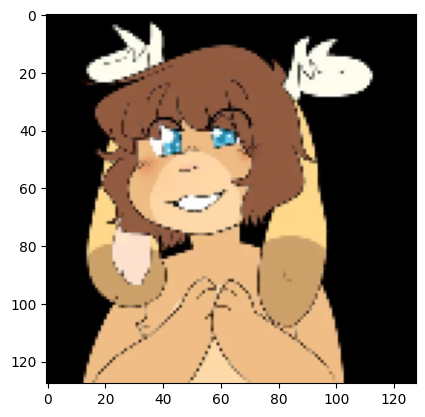

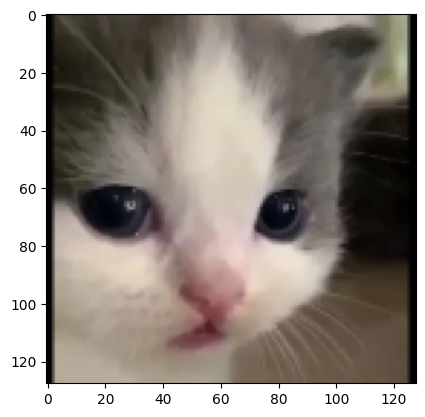

In [12]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.4. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [26]:
# функция для подсчета loss и accuracy на тренировочной выборке для одной эпохи
def training_epoch(model, optimizer, criterion, train_dataloader):
    train_loss, train_accuracy = 0.0, 0.0
    model.train()
    for images, labels in tqdm(train_dataloader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.shape[0]
        train_accuracy += (logits.argmax(dim=1) == labels).sum().item()

    train_loss /= len(train_dataloader.dataset)
    train_accuracy /= len(train_dataloader.dataset)
    return train_loss, train_accuracy

# функция для подсчета loss и accuracy на валидационной выборке для одной эпохи
@torch.no_grad() # отключаем подсчет градиентов на валидации
def validation_epoch(model, criterion, val_dataloader):
    val_loss, val_accuracy = 0.0, 0.0
    model.eval()
    for images, labels in tqdm(val_dataloader):
        images = images.to(device)
        labels = labels.to(device)

        logits = model(images)
        loss = criterion(logits, labels)

        val_loss += loss.item() * images.shape[0]
        val_accuracy += (logits.argmax(dim=1) == labels).sum().item()

    val_loss /= len(val_dataloader.dataset)
    val_accuracy /= len(val_dataloader.dataset)
    return val_loss, val_accuracy

# объединяем две функции для заданного числа эпох
def train(model, optimizer, criterion, train_dataloader, val_dataloader, num_epochs, scheduler=None, task=None):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    for epoch in range(1, num_epochs + 1):
        train_loss, train_accuracy = training_epoch(
            model, optimizer, criterion, train_dataloader
        )
        val_loss, val_accuracy = validation_epoch(
            model, criterion, val_dataloader
        )

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        print('Accuracy на тренировочной выборке:', train_accuracy)
        print('Accuracy на валидационной выборке:', val_accuracy)

        # делаем шаг в scheduler
        if scheduler is not None:
          scheduler.step()

        # останавливаем обучение при достижении необходимого значения accuracy в каждом из заданий
        if  val_accuracy >= 0.24 and task == 1:
          return train_losses, val_losses, train_accuracies, val_accuracies

        if  val_accuracy >= 0.34 and task == 2:
          return train_losses, val_losses, train_accuracies, val_accuracies

    return train_losses, val_losses, train_accuracies, val_accuracies

In [30]:
seed_everything(123456)
model = torchvision.models.resnet34(pretrained=False, num_classes = 100).to(device) # импортируем непредобученный resnet34 + меняем выход модели на 100 классов

num_epochs = 30
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

In [31]:
train_losses, val_losses, train_accuracies, val_accuracies = train(model, optimizer, criterion, train_dataloader, val_dataloader, num_epochs, scheduler=scheduler, task=1)

100%|██████████| 40/40 [00:04<00:00,  9.57it/s]


Accuracy на тренировочной выборке: 0.13392680948100072
Accuracy на валидационной выборке: 0.142


100%|██████████| 40/40 [00:02<00:00, 15.54it/s]


Accuracy на тренировочной выборке: 0.1380709101672989
Accuracy на валидационной выборке: 0.1444


100%|██████████| 40/40 [00:02<00:00, 15.67it/s]


Accuracy на тренировочной выборке: 0.142478128357489
Accuracy на валидационной выборке: 0.1468


100%|██████████| 40/40 [00:03<00:00, 13.25it/s]


Accuracy на тренировочной выборке: 0.14486811235117417
Accuracy на валидационной выборке: 0.1416


100%|██████████| 40/40 [00:03<00:00, 10.19it/s]


Accuracy на тренировочной выборке: 0.15032780055693204
Accuracy на валидационной выборке: 0.1568


100%|██████████| 40/40 [00:02<00:00, 15.57it/s]


Accuracy на тренировочной выборке: 0.15515162146161773
Accuracy на валидационной выборке: 0.1508


100%|██████████| 40/40 [00:02<00:00, 15.37it/s]


Accuracy на тренировочной выборке: 0.16030433924616835
Accuracy на валидационной выборке: 0.1556


100%|██████████| 40/40 [00:04<00:00,  9.70it/s]


Accuracy на тренировочной выборке: 0.16793474685903478
Accuracy на валидационной выборке: 0.1668


100%|██████████| 40/40 [00:02<00:00, 15.18it/s]


Accuracy на тренировочной выборке: 0.17591597781042384
Accuracy на валидационной выборке: 0.1748


100%|██████████| 40/40 [00:02<00:00, 15.51it/s]


Accuracy на тренировочной выборке: 0.18416032626570483
Accuracy на валидационной выборке: 0.1788


100%|██████████| 40/40 [00:03<00:00, 11.01it/s]


Accuracy на тренировочной выборке: 0.19211963075843622
Accuracy на валидационной выборке: 0.1928


100%|██████████| 40/40 [00:04<00:00,  9.88it/s]


Accuracy на тренировочной выборке: 0.20194268423706888
Accuracy на валидационной выборке: 0.1912


100%|██████████| 40/40 [00:02<00:00, 15.12it/s]


Accuracy на тренировочной выборке: 0.21294976648321529
Accuracy на валидационной выборке: 0.1956


100%|██████████| 40/40 [00:02<00:00, 15.52it/s]


Accuracy на тренировочной выборке: 0.2221150262021181
Accuracy на валидационной выборке: 0.2088


100%|██████████| 40/40 [00:02<00:00, 15.56it/s]


Accuracy на тренировочной выборке: 0.23310018198960686
Accuracy на валидационной выборке: 0.2048


100%|██████████| 40/40 [00:02<00:00, 15.56it/s]


Accuracy на тренировочной выборке: 0.24022628105334706
Accuracy на валидационной выборке: 0.218


100%|██████████| 40/40 [00:03<00:00, 10.91it/s]


Accuracy на тренировочной выборке: 0.2530313329094218
Accuracy на валидационной выборке: 0.2108


100%|██████████| 40/40 [00:02<00:00, 15.15it/s]


Accuracy на тренировочной выборке: 0.26322713618523474
Accuracy на валидационной выборке: 0.2176


100%|██████████| 40/40 [00:02<00:00, 15.54it/s]


Accuracy на тренировочной выборке: 0.27726006972613854
Accuracy на валидационной выборке: 0.2208


100%|██████████| 40/40 [00:02<00:00, 15.64it/s]


Accuracy на тренировочной выборке: 0.2860087267305457
Accuracy на валидационной выборке: 0.2296


100%|██████████| 40/40 [00:03<00:00, 13.07it/s]


Accuracy на тренировочной выборке: 0.2975858969017914
Accuracy на валидационной выборке: 0.2304


100%|██████████| 40/40 [00:04<00:00,  9.22it/s]


Accuracy на тренировочной выборке: 0.3081325235161269
Accuracy на валидационной выборке: 0.2308


100%|██████████| 40/40 [00:02<00:00, 15.03it/s]


Accuracy на тренировочной выборке: 0.3192053851382463
Accuracy на валидационной выборке: 0.2324


100%|██████████| 40/40 [00:02<00:00, 14.58it/s]


Accuracy на тренировочной выборке: 0.3278224833907076
Accuracy на валидационной выборке: 0.2348


100%|██████████| 40/40 [00:02<00:00, 15.23it/s]

Accuracy на тренировочной выборке: 0.3378867279145745
Accuracy на валидационной выборке: 0.2416


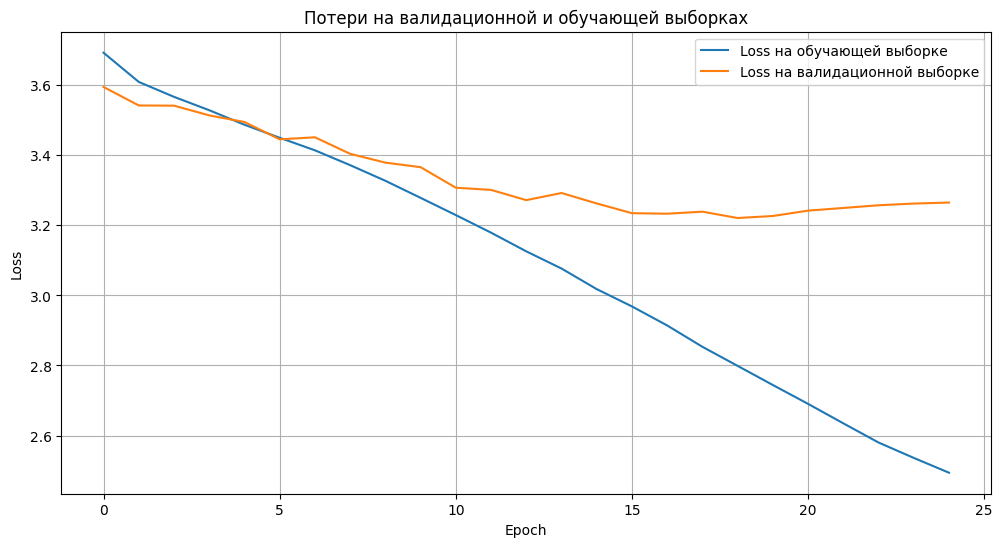

In [35]:
plt.figure(figsize = (12, 6))
plt.plot(train_losses, label = 'Loss на обучающей выборке')
plt.plot(val_losses, label = 'Loss на валидационной выборкe')
plt.title('Потери на валидационной и обучающей выборках')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

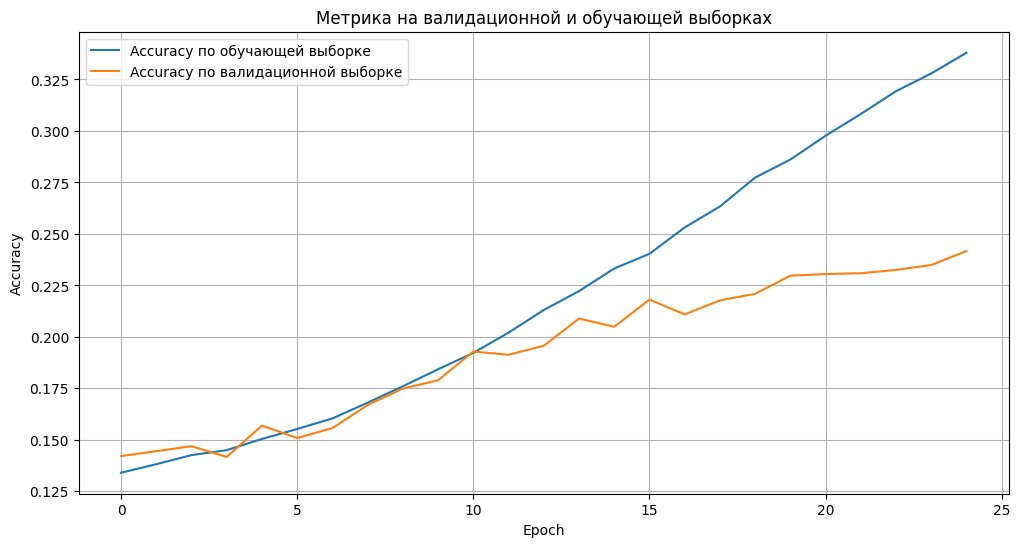

In [36]:
plt.figure(figsize = (12, 6))
plt.plot(train_accuracies, label = 'Accuracy по обучающей выборке')
plt.plot(val_accuracies, label = 'Accuracy по валидационной выборкe')
plt.title('Метрика на валидационной и обучающей выборках')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### Валидация результатов задания

In [37]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy = 0.0
    for images, labels in tqdm(val_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            logits = model(images)
            accuracy += (logits.argmax(dim=1) == labels).sum().item()
    accuracy = accuracy / len(val_dataloader.dataset)
    return accuracy

In [39]:
accuracy = evaluate_task(model, val_dataloader)
print("\nacurracy на валидационной выборке:", accuracy)
print(f"Оценка за это задание составит {np.clip(5 * accuracy / 0.24, 0, 5):.2f} баллов")

100%|██████████| 40/40 [00:02<00:00, 15.56it/s]


acurracy на валидационной выборке: 0.2416
Оценка за это задание составит 5.00 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.8. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры лучше используйте Adam c параметрами по умолчанию как стартовую точку.
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [40]:
train_transform = T.Compose([
    T.Resize((270, 270)), # изменяем размер изображения до 270x270 пикселей
    T.RandomHorizontalFlip(),
    T.RandomRotation(20),
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2), # случайное изменение яркости, контрастности, насыщенности и цветового тона
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # нормализация тензора изображения
])

In [41]:
val_transform = T.Compose([
    T.Resize((270, 270)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [42]:
train_dataset = ImageFolder('/content/train', transform=train_transform)
val_dataset = ImageFolder('/content/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True, pin_memory=True, num_workers = 4)
val_dataloader = DataLoader(val_dataset, batch_size = 64, shuffle = False, pin_memory=True, num_workers = 4)

In [49]:
seed_everything(123456)
model = torchvision.models.resnet34(pretrained = True).to(device) # импортируем предобученный resnet34

# будем обучать только последний слой и голову модели
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True
for param in model.layer4.parameters():
    param.requires_grad = True

# заменяем исходную голову модели на голову с правильным числом классов (100)
model.fc = torch.nn.Linear(model.fc.in_features, len(train_dataset.classes))
model.to(device)

num_epochs = 30
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

In [50]:
train_losses, val_losses, train_accuracies, val_accuracies = train(model, optimizer, criterion, train_dataloader, val_dataloader, num_epochs, scheduler=scheduler, task=2)

100%|██████████| 40/40 [00:10<00:00,  3.86it/s]


Accuracy на тренировочной выборке: 0.184927752318723
Accuracy на валидационной выборке: 0.2196


100%|██████████| 40/40 [00:10<00:00,  3.78it/s]


Accuracy на тренировочной выборке: 0.24388799964917665
Accuracy на валидационной выборке: 0.2464


100%|██████████| 40/40 [00:10<00:00,  3.95it/s]


Accuracy на тренировочной выборке: 0.2796719801784814
Accuracy на валидационной выборке: 0.2728


100%|██████████| 40/40 [00:10<00:00,  3.95it/s]


Accuracy на тренировочной выборке: 0.31218891836779444
Accuracy на валидационной выборке: 0.2852


100%|██████████| 40/40 [00:10<00:00,  3.93it/s]


Accuracy на тренировочной выборке: 0.3383033306290701
Accuracy на валидационной выборке: 0.2928


100%|██████████| 40/40 [00:08<00:00,  4.68it/s]


Accuracy на тренировочной выборке: 0.3634529787094086
Accuracy на валидационной выборке: 0.3116


100%|██████████| 40/40 [00:08<00:00,  4.67it/s]


Accuracy на тренировочной выборке: 0.3880763917819633
Accuracy на валидационной выборке: 0.3132


100%|██████████| 40/40 [00:08<00:00,  4.73it/s]


Accuracy на тренировочной выборке: 0.41447584800578857
Accuracy на валидационной выборке: 0.3068


100%|██████████| 40/40 [00:08<00:00,  4.59it/s]


Accuracy на тренировочной выборке: 0.4390115552437126
Accuracy на валидационной выборке: 0.3204


100%|██████████| 40/40 [00:10<00:00,  3.94it/s]


Accuracy на тренировочной выборке: 0.4654987173021685
Accuracy на валидационной выборке: 0.3192


100%|██████████| 40/40 [00:11<00:00,  3.55it/s]


Accuracy на тренировочной выборке: 0.48876268993794814
Accuracy на валидационной выборке: 0.3292


100%|██████████| 40/40 [00:10<00:00,  3.80it/s]


Accuracy на тренировочной выборке: 0.5186046001710264
Accuracy на валидационной выборке: 0.3316


100%|██████████| 40/40 [00:08<00:00,  4.76it/s]

Accuracy на тренировочной выборке: 0.5520643760826189
Accuracy на валидационной выборке: 0.3408


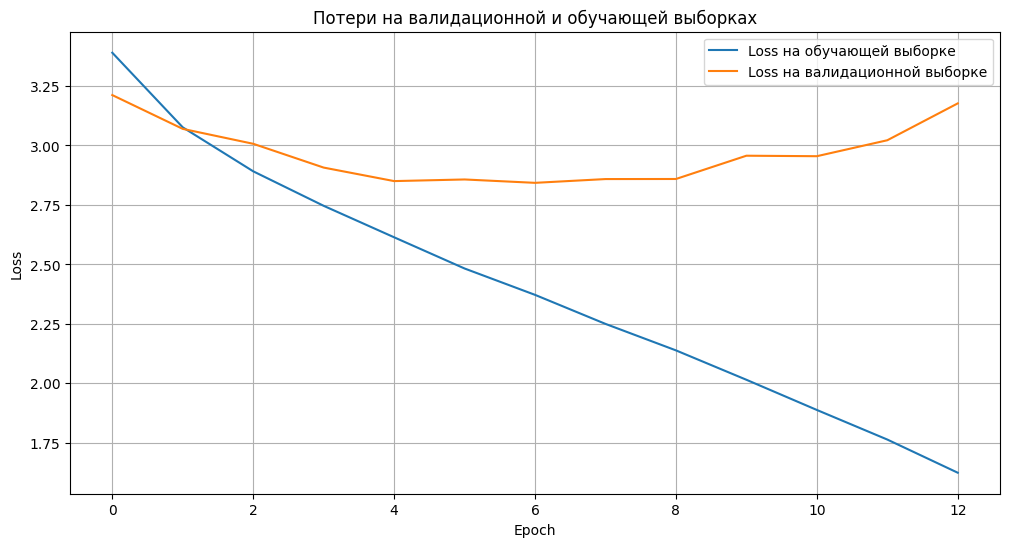

In [51]:
plt.figure(figsize = (12, 6))
plt.plot(train_losses, label = 'Loss на обучающей выборке')
plt.plot(val_losses, label = 'Loss на валидационной выборкe')
plt.title('Потери на валидационной и обучающей выборках')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

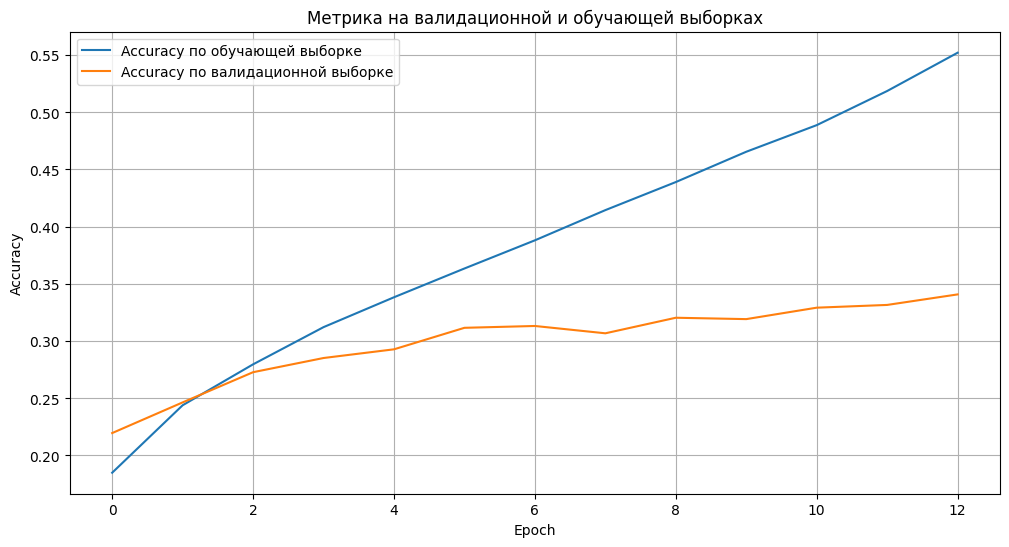

In [52]:
plt.figure(figsize = (12, 6))
plt.plot(train_accuracies, label = 'Accuracy по обучающей выборке')
plt.plot(val_accuracies, label = 'Accuracy по валидационной выборкe')
plt.title('Метрика на валидационной и обучающей выборках')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### Валидация результатов задания

In [54]:
model = model

accuracy = evaluate_task(model, val_dataloader)
print("\nacurracy на валидационной выборке:", accuracy)
print(f"Оценка за это задание составит {np.clip(5 * (accuracy - 0.24) / 0.1, 0, 5):.2f} баллов")

100%|██████████| 40/40 [00:08<00:00,  4.59it/s]


acurracy на валидационной выборке: 0.3408
Оценка за это задание составит 5.00 баллов


# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

**Задание 1:**

В качестве оптимизатора я взял Adam, так как он комбинирует преимущества Momentum и RMSprop + автоматически подбирает шаг обучения, размер батча я взял 32 на тренировочной выборке и 64 на валидационной, так как на лекциях и семинарах рекомендовали брать батчи небольшого размера, да и сам я поэкспериментировал с различными значениями. После этого я подобрал оптимальное начальное значение lr путем экспериментирования, стал замечать, что в конечном итоге модель переобучается и accuracy на тренировочной выборке доходит до 90%, из-за этого попытался добавить L2 регуляризацию (weight_decay) в оптимизатор, но даже при низком коэффициенте это негативно влияло на обучение модели, и я не смог выбить на валидационной выборке даже столько же, сколько выбивал без регуляризации.

 Вместо регуляризации я решил добавить аугментацию, чтобы улучшить обобщающую способность модели и побороть переобучение, и это дало свои плоды: до аугментации я максимально выбивал на валидационной выборке за 30 эпох - 0,2287, а при ее использовании смог выбить > 0,24.

 Также стоит отменить сильную пользу косинуснного scheduler (он постепенно уменьшает скорость обучения по косинусной кривой, что помогает модели избегать локальных минимумов и улучшать обобщение), таким образом, без него я в среднем получал максимальный accuracy на валидационной выборке на 0,02 - 0,03 меньше, чем при его использовании.

**Задание 2:**

Теперь появился доступ к ресайзу картинок и импортированию предообученной модели. В модели из предыдущего задания я практически ничего не менял: только импортировал предобученные веса resnet34, а также изменил аугментацию, добавив ресайз картинок (путем экспериментирования я получил оптимальный ресайз 270x270 пикселей) и нормализацию тензора изображения (что делает градиенты более стабильными и помогает модели быстрее сходиться к оптимуму). Также я принял решение обучать только последний слой и голову модели, так как это давало более высокие результаты, чем при обучении всех слоев (0,3011 против 0,2818) + обучение модели на каждой эпохе занимало намного меньше времени. В итоге, благодаря использованию предобученной модели (без добавления ресайза и нормализации) я получил максимальный accuracy на валидационной выборке за 30 эпох - 0,3011, вместо 0,2416 в первом задании. А после подбора оптимального ресайза и нормализации я смог выбить заветные 0,34.